In [199]:
import numpy as np
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import matplotlib.pyplot as plt
import itertools
from matplotlib import animation, rc
from IPython.display import HTML

In [21]:
# constructs a 1D sparse centered difference operator
def centered_finite_difference_1d(N):
    cols = list(itertools.chain(range(1,N),range(N-1)))
    rows = list(itertools.chain(range(N-1),range(N-1)))
    values = [1 for _ in range(N-1)] + [-1 for _ in range(N-1)]
    print(len(cols),len(rows),len(values))
    return sp.sparse.coo_matrix((values,(rows,cols)),shape=(N-1,N))

In [229]:
N = 40
dt = 1. / N
D = centered_finite_difference_1d(N)
L = 1./dt**2 * D.transpose() * D

78 78 78


In [136]:
L.todense()

matrix([[ 1600., -1600.,     0., ...,     0.,     0.,     0.],
        [-1600.,  3200., -1600., ...,     0.,     0.,     0.],
        [    0., -1600.,  3200., ...,     0.,     0.,     0.],
        ...,
        [    0.,     0.,     0., ...,  3200., -1600.,     0.],
        [    0.,     0.,     0., ..., -1600.,  3200., -1600.],
        [    0.,     0.,     0., ...,     0., -1600.,  1600.]])

In [144]:
x = np.linspace(0,1,N)

In [222]:
u = np.sin(4 * np.pi * x)

u = 2*np.exp(-(x-.5)**2 / (.1**2))
up = 2*np.exp(-(x-.51)**2 / (.1**2))

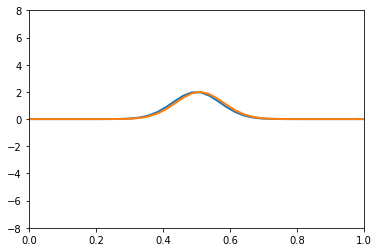

In [230]:
# First set up the figure, the axis, and the plot element we want to animate
fig, ax = plt.subplots()

ax.set_xlim(( 0, 1))
ax.set_ylim((-8, 8))

line, = ax.plot(x, u, lw=2)
line2, = ax.plot(x, up, lw=2)


In [231]:
# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    line2.set_data([], [])
    return (line,line2)

In [232]:
dt = .1
c = .1
# animation function. This is called sequentially
def animate_explicit_stormer_verlet(i,data):
    u,up = data
    # standard stormer explicit stormer verlet
    # u_{t+1} - 2 u_{t} + u_{t-1} = -dt^2 c^2 \Delta (u_{t})
    u,up = 2 * u - up - dt**2 * c**2 * L * u, u
    line.set_data(x, u)
    line2.set_data(x, up)
    data[:] = [u,up]
    return (line,line2)

    

In [226]:
anim = animation.FuncAnimation(fig, animate_explicit_stormer_verlet, init_func=init,fargs=([u,up],),
                               frames=500, interval=20, blit=True)
HTML(anim.to_html5_video())

In [227]:
dt = .1
c = .1
# animation function. This is called sequentially
def animate_implicit_stormer_verlet(i,data):
    u,up = data
    # second order centered difference
    # u_{t+1} - 2 u_{t} + u_{t-1} = -dt^2 c^2 \Delta (u_{t+1} + u_{t-1})/2
    b = 2 * u - up - .5 * dt**2 * c**2 * L * up
    A = sp.sparse.identity(N) + .5 * dt**2 * c**2 * L
    un,suc = sp.sparse.linalg.cg(A,b)
    u,up = un,u
    line.set_data(x, u)
    line2.set_data(x, up)
    data[:] = [u,up]
    return (line,line2)

    

In [228]:
anim = animation.FuncAnimation(fig, animate_implicit_stormer_verlet, init_func=init,fargs=([u,up],),
                               frames=500, interval=20, blit=True)
HTML(anim.to_html5_video())